# Phase Estimation

## Input
1. An known unitary $U$ and its eigenstate $\vert\psi\rangle$ with $U\vert\psi\rangle=e^{2\pi i\theta}\vert\psi\rangle$

## Goal
1. Estimate $\theta$
2. Extensiblity:
    - can choose the number of qubit for the first register in order to accommodate to contrains in qubit available.
3. Error Assessment:
    - Submit the circuit to simulator and actual quantum computers several time to get distribution of the error.

## Cicuit Construction
### package

In [19]:
import numpy as np
from math import pi
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister, BasicAer, execute, IBMQ
from qiskit.visualization import plot_bloch_multivector, plot_histogram

### Circuit init

In [20]:
def pe_circ_init(size:int):
    #quantum register and  single state for storing eigen-state
    qr = QuantumRegister(size)
    psi = QuantumRegister(1,name="psi")
    #classical bits for readout
    cr = ClassicalRegister(size)
    
    qc = QuantumCircuit(qr,psi,cr)
    # apply Hadamards and init the eigenstate as |1>
    for i in range(size):
        qc.h(i)
    qc.x(size)
    
    qc.barrier()
    
    return qc

### Random Parameter 

In [21]:
k = np.random.random()
print(k)

0.7173745456743769


### Fixed Parameter

In [22]:
size = 4

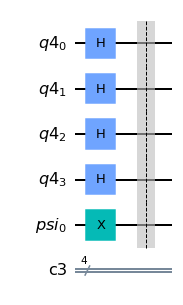

In [23]:
qc = pe_circ_init(size)
qc.draw("mpl")

In [24]:
def C_U(circuit:QuantumCircuit, size:int, k:float):
    rep = 1
    for counting_qubit in range(size):
        for i in range(rep):
            circuit.cu1(2*pi*k, counting_qubit, size)
        rep *= 2
    circuit.barrier()
    return circuit

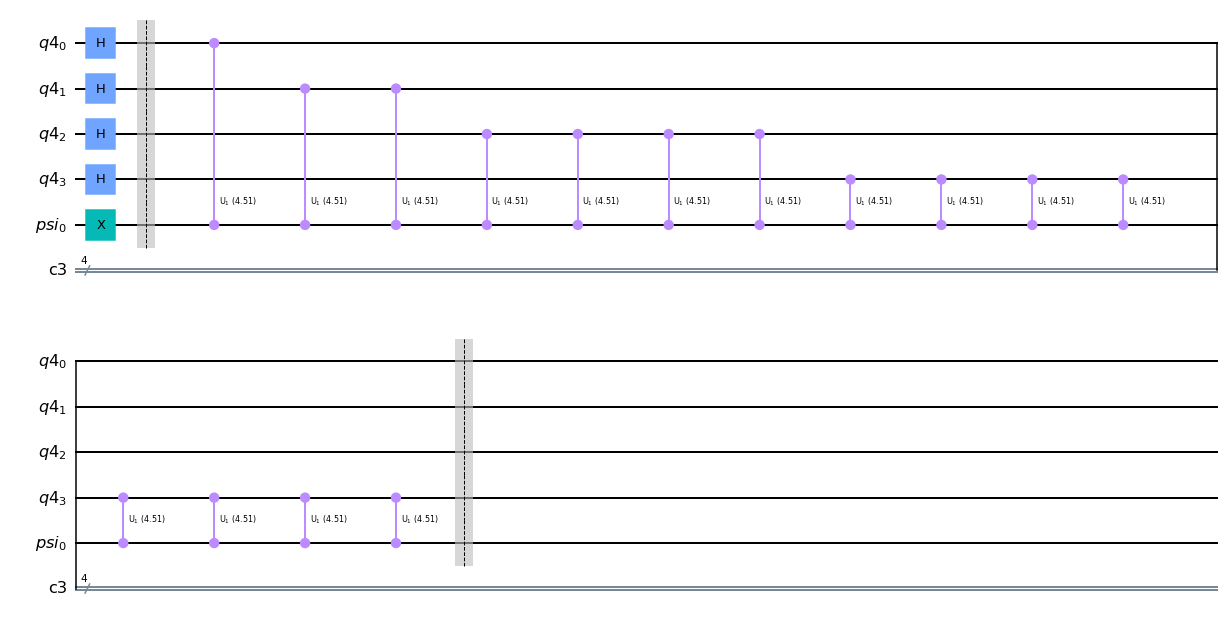

In [25]:
qc = C_U(qc, size,k)
qc.draw("mpl")

In [ ]:
def 